### Creating Positive and Negative Images from Originals and Masks

In [3]:
from pathlib import Path
import cv2
import numpy as np
import matplotlib.pyplot as plt

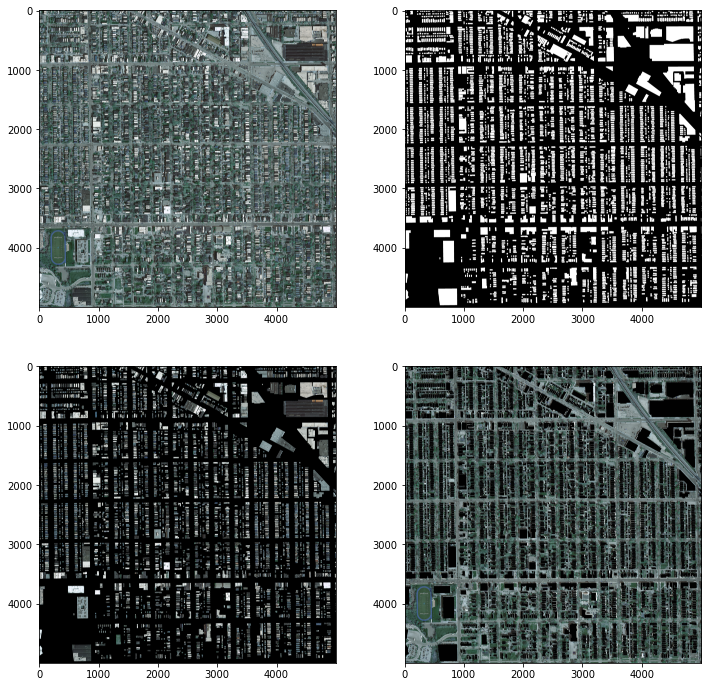

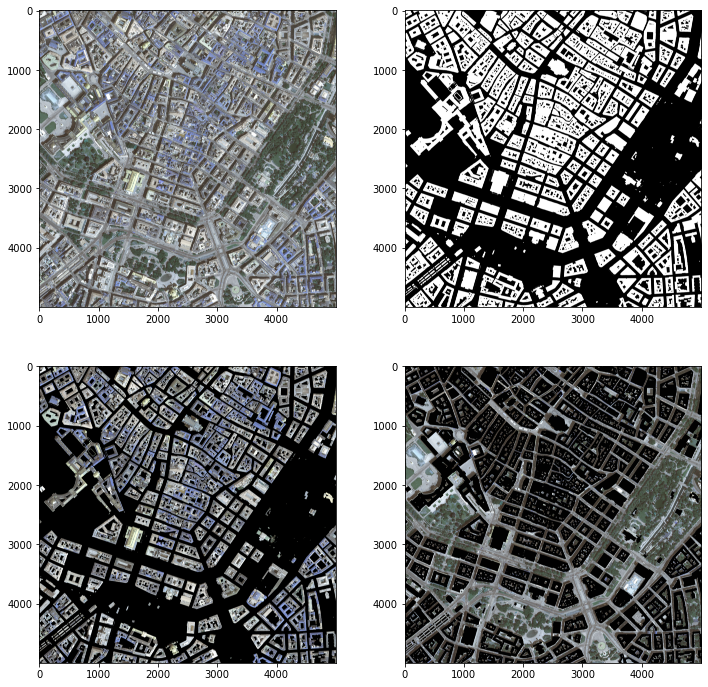

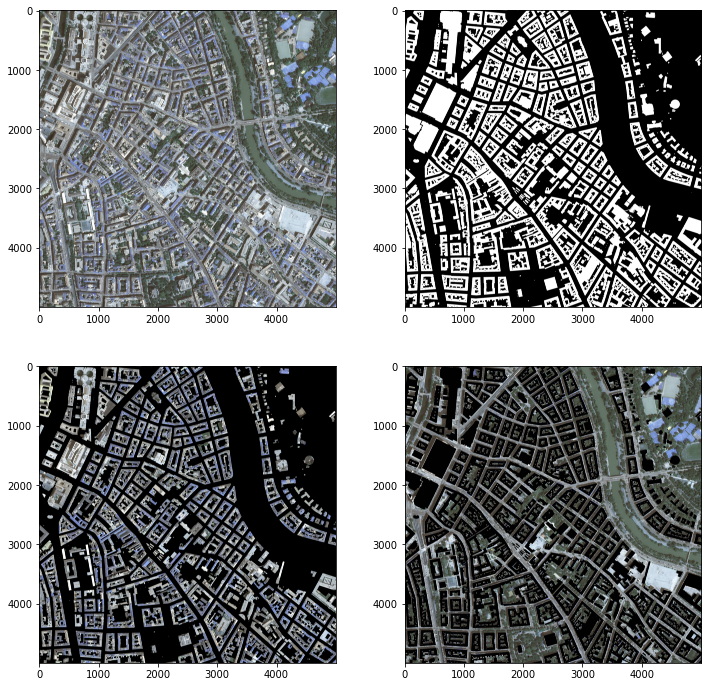

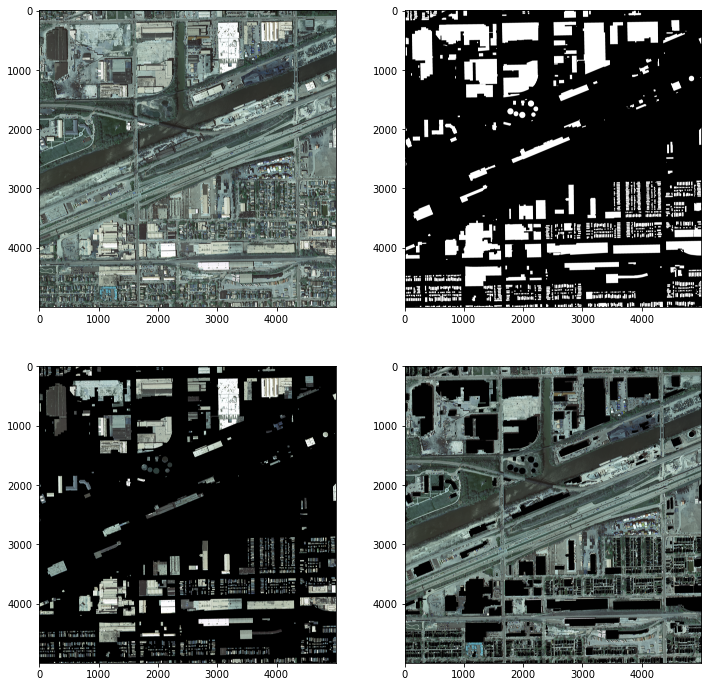

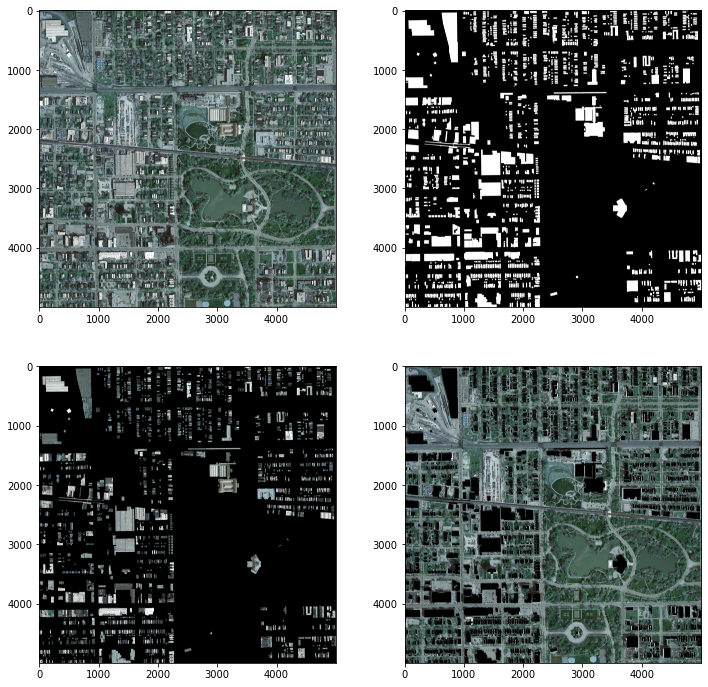

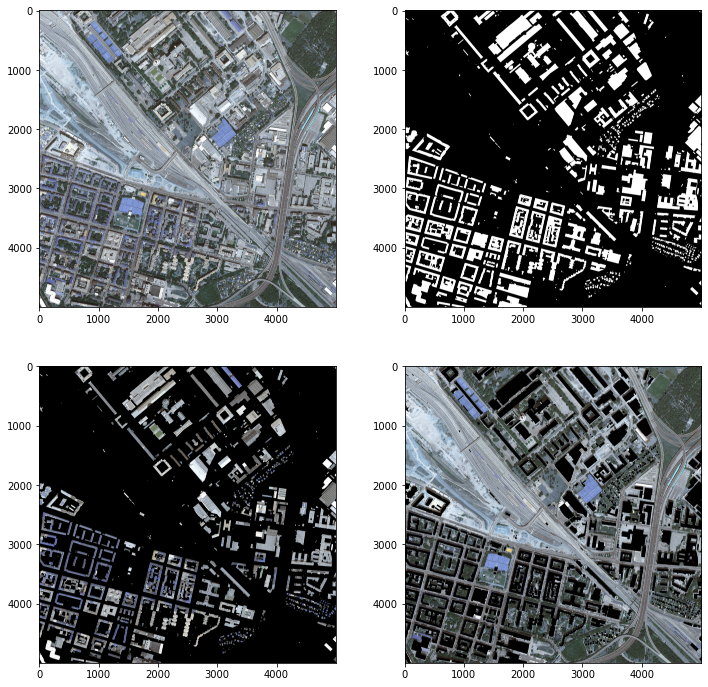

In [4]:

build_path = Path('images/training/build/0/')
mask_path = Path('images/training/mask/0/')

# Save path
build_pos = Path('images/build_pos/0/')
build_neg = Path('images/build_neg/0/')

for i, image in enumerate(build_path.glob('*.tif')):

    original = cv2.imread(str(image))
    masked = cv2.imread(str(mask_path / image.name))
    positive = np.zeros_like(masked, np.uint8)
    negative = np.ones_like(masked, np.uint8)

    ## find the nozero regions in the gray
    # imask is pixels that are white
    imask = masked > 150
    dmask = masked < 150
    positive[imask] = original[imask]
    negative[dmask] = original[dmask]

    # Only for checking images
    fig, (ax1, ax2) = plt.subplots(figsize=(12,12), nrows=2, ncols=2)
    ax1[0].imshow(original)
    ax1[1].imshow(masked)
    ax2[0].imshow(positive)
    ax2[1].imshow(negative)

    if i > 4:
        break
    
    # pos_resized = cv2.resize(positive, (1024, 1024))
    # neg_resized = cv2.resize(negative, (1024, 1024))

    # cv2.imwrite(build_pos  / f'{image.stem}.jpg', pos_resized)
    # cv2.imwrite(build_neg / f'{image.stem}.jpg', neg_resized)

